<a href="https://colab.research.google.com/github/rojinakbudak/kurumsal-web-sitesi/blob/main/duyguAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Downloading the Dataset
url="https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"


In [2]:
import tensorflow as tf

In [10]:
dataset=tf.keras.utils.get_file("aclImdb_v1" ,
                        url ,
                        untar=True,
                        cache_dir=".",
                        cache_subdir=" ")

##veri seti indirildi

In [13]:
import os

dataset_dir=os.path.join(os.path.dirname(dataset),"aclImdb")
##veri setinin yolunu dataset_dir değişkenine atadık

In [14]:
os.listdir(dataset_dir)

['test', 'train', 'imdb.vocab', 'imdbEr.txt', 'README']

In [16]:
train_dir=os.path.join(dataset_dir,"train")
os.listdir(train_dir)
##train klasöründeki dosyaları getirdi

['labeledBow.feat',
 'neg',
 'unsup',
 'urls_unsup.txt',
 'urls_neg.txt',
 'unsupBow.feat',
 'urls_pos.txt',
 'pos']

In [17]:
sample_file = os.path.join(train_dir, "pos/0_9.txt")
with open(sample_file) as f:
  print(f.read())
  #etiketi pozitif olan yorum geldi

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [23]:
import shutil
remove_dir = os.path.join(train_dir, "unsup")
shutil.rmtree(remove_dir)
#unsup dosyası kaldırıldı

FileNotFoundError: [Errno 2] No such file or directory: './ /aclImdb/train/unsup'

In [27]:
batch_size=32
seed=42
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2, #verisetinin %20'sinin validasyon verisi olması isteniyor
    subset="training",
    seed = seed)
#eğitim veri seti oluştu

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [25]:
import numpy as np
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review" , text_batch.numpy()[i])
    print("Label" , label_batch.numpy()[i])
##datasetteki 3 yorumun metni ve etiketi

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [28]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2, #verisetinin %20'sinin validasyon verisi olması isteniyor
    subset="validation",
    seed = seed)
##validasyon verisi oluşturuldu

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [31]:
test_dir=os.path.join(dataset_dir,"test")
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size,
    )
##test veriseti oluşturuldu

Found 25000 files belonging to 2 classes.


In [49]:
import re
import string
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html=tf.strings.regex_replace(lowercase, '<br />', '')
  return tf.strings.regex_replace(
      stripped_html, '[%s]' % re.escape(string.punctuation),'')


In [50]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_features=10000
sequence_length=250
vectorize_layer=tf.keras.layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens = max_features,
    output_mode="int",
    output_sequence_length=250
)
#özelleştirdiğimiz TextVectorization katmanı oluşturuldu

In [51]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [52]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label
  #yukarıdaki katmandan çıkan sonuçları görmek için fonksiyonu yazdık

In [53]:
text_batch, label_batch = next(iter(raw_train_ds))
#metinleri ve etiketleri barındıran değişkenleri oluşturduk


In [54]:
first_review, first_label= text_batch[0], label_batch[0]
print("Review: ", first_review)
print("Label: ", raw_train_ds.class_names[first_label])
print("Processed data: ", vectorize_text(first_review, first_label))
#veri setinden bir grup yorumu ve etiketi ilk değerleri alacak şekilde getirdik

Review:  tf.Tensor(b"This is really terrible.<br /><br />The only redeeming feature about this movie is that the next time people ask me what is the worst vampire movie I have ever watched, I would have a suitable reply.<br /><br />I think it is filmed on 35 mm so it is already tacky like hell. I wouldn't have bothered commenting but I noticed some fanboys (probably connected to the movie) had claimed that this was the best movie since the Matrix. Let me debunk the myths and lies.<br /><br />There is nothing good in the movie. Everything yells tacky. The actress is ugly. The fight choreography is the worst I have ever seen. The fight scenes are unbelievably amateurish. Imagine a girl flailing her arms around in a circle helplessly and delivering weak kicks which wouldn't hurt a kitten. Obviously, the director just pulled people off the street to give them roles in the movie.<br /><br />I know the director did not have much budget for the movie but still better movies have been made on 

In [55]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

#TextVectorization katmanını daha önce oluşturduğumuz test, validasyon ve eğitim setlerine uyguladık
#Böylece validasyon test ve eğitim verileri temizlenmiş oldu

In [56]:
#Girdi ve çıktıların birbirini engellemediğine emin olmak için iki metot kullanılabilir
#cache metodu verileri diskten yükledikten sonra bellekte tutar. Böylece eğitim esnasında verisetinin darboğaz haline gelmesini engeller.
#veriseti belleğe sığmayacak kadar büyükse verileri küçük dosyalar halinde okunmasını sağlar
#prefetch metodu ise eğitim esnasında veri ön işlemeyi ve model uygulamayı beraber kılar



In [57]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#veri işleme süreci bitti . model kurulabilir

In [58]:
#metin verilerini sinir ağlarında kullanmak için embedding katmanı kullanılır

In [59]:
embedding_dim=16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features+1, 16),
    #tamsayı ile kodlanmış metinleri alır ve bu vektörler model eğitilirken kullanılır
    tf.keras.layers.Dropout(0.2),
    #regülerleştirme için dropout kullanıldı
    tf.keras.layers.GlobalAveragePooling1D(),
    #bu katman dizi boyutunun ortalamasını alıp her bir örnek için sabit uzunlukta çıktı vektörü döndürür
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
])


In [60]:
model.summary()
#modelin özet bilgisini yazdırdı

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160033 (625.13 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [61]:
#modeli kurduktan sonra modeli derliyoruz

In [62]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = "adam",
    metrics = tf.metrics.BinaryAccuracy(threshold=0.0)
)

In [63]:
#modeli eğitmeye başladık

In [64]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
625/625 [==============================] - 10s 14ms/step - loss: 0.6663 - binary_accuracy: 0.6886 - val_loss: 0.6192 - val_binary_accuracy: 0.7718
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5531 - binary_accuracy: 0.7983 - val_loss: 0.5029 - val_binary_accuracy: 0.8228
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.4499 - binary_accuracy: 0.8426 - val_loss: 0.4250 - val_binary_accuracy: 0.8488
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3831 - binary_accuracy: 0.8625 - val_loss: 0.3785 - val_binary_accuracy: 0.8602
Epoch 5/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3399 - binary_accuracy: 0.8764 - val_loss: 0.3498 - val_binary_accuracy: 0.8658
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3103 - binary_accuracy: 0.8868 - val_loss: 0.3306 - val_binary_accuracy: 0.8710
Epoch 7/10
625/625 [==============================] - 5s 7ms

In [65]:
#her bir epoch'tan(devirden) sonra modelin eğitim verisi üzerinde doğruluğu ve kaybı ekrana yazıldı

In [66]:
loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)
#doğruluğun ve kaybın değerini ekrana yazdırdı

782/782 [==============================] - 11s 14ms/step - loss: 0.3144 - binary_accuracy: 0.8711
Loss:  0.3143848180770874
Accuracy:  0.8710799813270569


In [67]:
history_dict = history.history
history_dict.keys()
#history_dict bbir history nesnesi döndürür. bu nesne eğitim esnasındaki metrikleri içerir

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [68]:
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

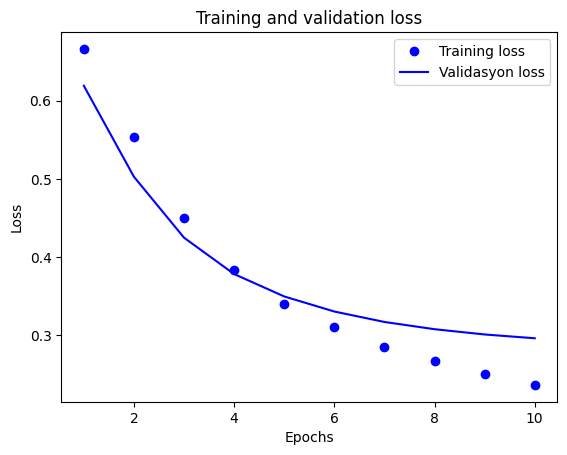

In [73]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validasyon loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#eğitim ve validasyon için kayıpların grafiği çizildi

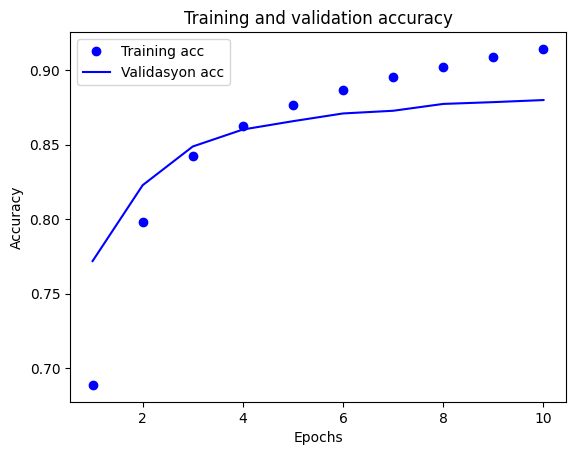

In [72]:
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validasyon acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#eğitim ve validasyon için doğrulukların grafiği çizildi

#eğitim verileri üzerinde modelin doğruluğu validasyon verilerinden daha fazla . bu modelin ezberlediği anlamına gelir.
#diğer bir ifade ile model eğitim verileni iyi tahmin ederken validasyon verileni tahmin edemiyor
#böyle problemlerde genelleştirme problemi olur. bu problemin üstesinden gelmek için erken durdurma veya regülerleştirme teknikleri kullanılır

In [74]:
export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    tf.keras.layers.Activation("sigmoid")
])

In [75]:
export_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer="adam",
    metrics = ["accuracy"]
)

In [76]:
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 5s 6ms/step - loss: 0.3144 - accuracy: 0.8711
0.8710799813270569


In [80]:
examples = [
  "The movie was perfect",
  "The movie was okay",
  "The movie was terrible"
]

In [81]:
export_model.predict(examples)

1/1 [==============================] - 0s 37ms/step


array([[0.6178846 ],
       [0.43395373],
       [0.35908613]], dtype=float32)